# Logistic Regression Classifier

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from dataloaders import SKLMatchedPairsCGL
from evaluation import evaluate

## Unmatched halves without hyperparameter tuning

### Load data

In [24]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='unmatched_halves', seed=1234)

### fit classifier

In [25]:
clf = LogisticRegression(max_iter = 1000, random_state = data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

LogisticRegression(max_iter=1000, random_state=np.int64(421))

### evaluate

In [26]:
y_dev_pred = clf.predict(data.X_dev)
print(f'Logistic Regression Accuracy: {accuracy_score(data.y_dev, y_dev_pred):.2f}')

Logistic Regression Accuracy: 0.67


## Matched pairs without hyperparameter tuning

### Load data

In [27]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='half_matches', seed=1234)

### fit classifier

In [28]:
clf = LogisticRegression(max_iter = 1000, random_state = data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

LogisticRegression(max_iter=1000, random_state=np.int64(421))

### evaluate

In [30]:
y_dev_pred = clf.predict(data.X_dev)
print(f'Logistic Regression Accuracy: {accuracy_score(data.y_dev, y_dev_pred):.2f}')

Logistic Regression Accuracy: 0.68


## All matched pairs

### Load data

In [31]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='all_matches', seed=1234)

### Fit classifier

In [32]:
clf = LogisticRegression(max_iter = 1000, random_state = data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

LogisticRegression(max_iter=1000, random_state=np.int64(421))

### Evaluate

In [33]:
y_dev_pred = clf.predict(data.X_dev)
print(f'Logistic Regression Accuracy: {accuracy_score(data.y_dev, y_dev_pred):.2f}')

Logistic Regression Accuracy: 0.73


## Summary of all the matched(half-sized), unmatched(half-sized), and matched(full-sized) dataset

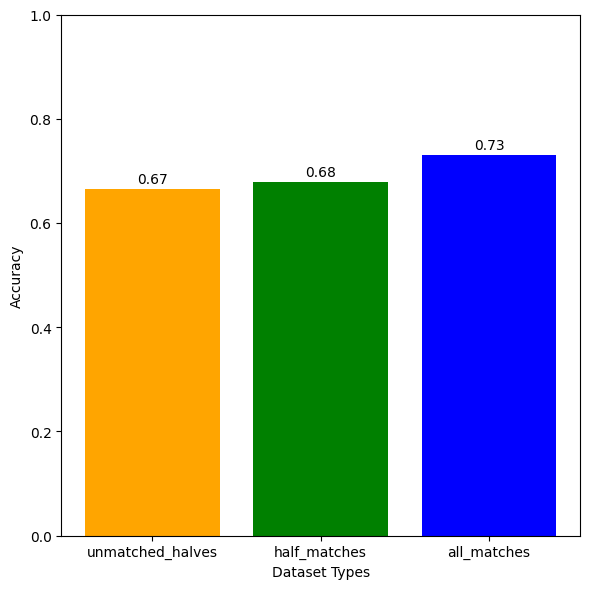

In [56]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'

dataset_types = ['unmatched_halves', 'half_matches', 'all_matches']
accuracies = []

for i, dataset_type in enumerate(dataset_types):

    data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match=dataset_type, seed=1234)
    clf = LogisticRegression(max_iter = 1000, random_state = data.rng.integers(data.seed))

    clf.fit(data.X_train, data.y_train)
    y_dev_pred = clf.predict(data.X_dev)

    accuracies.append(accuracy_score(data.y_dev, y_dev_pred))

plt.figure(figsize=(6, 6))
bars = plt.bar(dataset_types, accuracies, color=['Orange', 'Green', 'Blue'])

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{acc:.2f}', ha='center', va='bottom')

plt.xlabel('Dataset Types')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Penalty mode and Regularization strength evaluation

In [34]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='all_matches', seed=1234)

In [57]:
penalties = ['l1', 'l2', None]
Cs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]
theta = {}
accuracy = {}

for penalty in penalties:
    theta[penalty] = {}
    accuracy[penalty] = {}
    for C in Cs:
        clf = LogisticRegression(penalty = penalty, solver = 'saga', C = C, max_iter = 3000, random_state = data.rng.integers(data.seed))
        clf.fit(data.X_train, data.y_train)
        y_dev_pred = clf.predict(data.X_dev)
        score = accuracy_score(data.y_dev, y_dev_pred)
        print('The penalty mode is ', penalty, ", C = ", C, f'. Logistic Regression Accuracy: {score:.2f}')

        theta[penalty][C] = clf.coef_.reshape((2, 32, 32))
        accuracy[penalty][C] = score

The penalty mode is  l1 , C =  0.01 . Logistic Regression Accuracy: 0.50
The penalty mode is  l1 , C =  0.02 . Logistic Regression Accuracy: 0.50
The penalty mode is  l1 , C =  0.05 . Logistic Regression Accuracy: 0.67
The penalty mode is  l1 , C =  0.1 . Logistic Regression Accuracy: 0.69
The penalty mode is  l1 , C =  0.2 . Logistic Regression Accuracy: 0.67
The penalty mode is  l1 , C =  0.5 . Logistic Regression Accuracy: 0.66
The penalty mode is  l1 , C =  1 . Logistic Regression Accuracy: 0.65
The penalty mode is  l1 , C =  2 . Logistic Regression Accuracy: 0.64
The penalty mode is  l1 , C =  5 . Logistic Regression Accuracy: 0.63
The penalty mode is  l2 , C =  0.01 . Logistic Regression Accuracy: 0.68
The penalty mode is  l2 , C =  0.02 . Logistic Regression Accuracy: 0.66
The penalty mode is  l2 , C =  0.05 . Logistic Regression Accuracy: 0.65
The penalty mode is  l2 , C =  0.1 . Logistic Regression Accuracy: 0.65


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The penalty mode is  l2 , C =  0.2 . Logistic Regression Accuracy: 0.65


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The penalty mode is  l2 , C =  0.5 . Logistic Regression Accuracy: 0.65


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The penalty mode is  l2 , C =  1 . Logistic Regression Accuracy: 0.65


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The penalty mode is  l2 , C =  2 . Logistic Regression Accuracy: 0.64
The penalty mode is  l2 , C =  5 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  0.01 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  0.02 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  0.05 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  0.1 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  0.2 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  0.5 . Logistic Regression Accuracy: 0.63
The penalty mode is  None , C =  1 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  2 . Logistic Regression Accuracy: 0.63


/Users/wenj/cgl-stability-classifiers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The penalty mode is  None , C =  5 . Logistic Regression Accuracy: 0.63


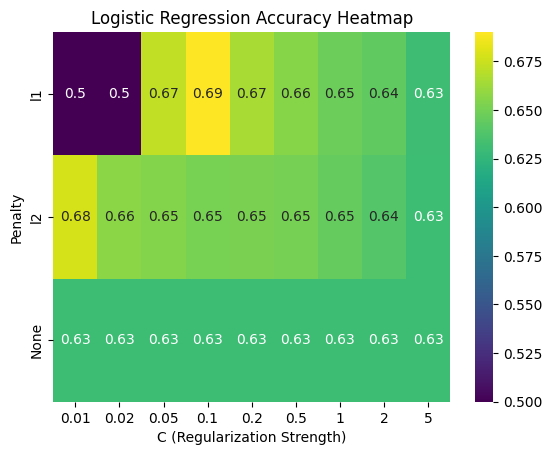

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

penalty_labels = ['l1', 'l2', 'None']
Cs_label = ['0.01', '0.02', '0.05', '0.1', '0.2', '0.5', '1', '2', '5']

accuracy_matrix = np.zeros((len(penalties), len(Cs)))
for i, penalty in enumerate(penalties):
    row = []
    for j, C in enumerate(Cs):
        accuracy_matrix[i,j] = accuracy[penalty][C]

vmin = accuracy_matrix.min()
vmax = accuracy_matrix.max()
sns.heatmap(data = accuracy_matrix, vmin = vmin, vmax = vmax, annot = True, cmap = 'viridis', xticklabels = Cs_label, yticklabels = penalty_labels, cbar = True)
plt.title('Logistic Regression Accuracy Heatmap')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Penalty')
plt.show()

### Figures for different Cs when penalty = L1 method

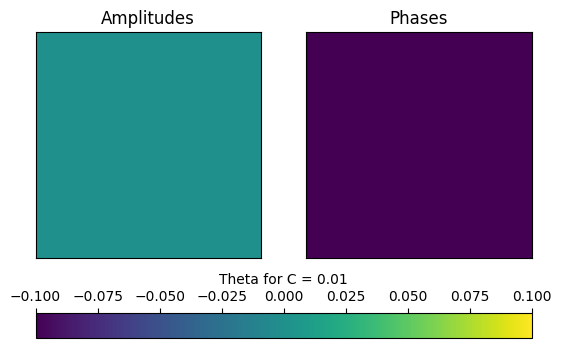

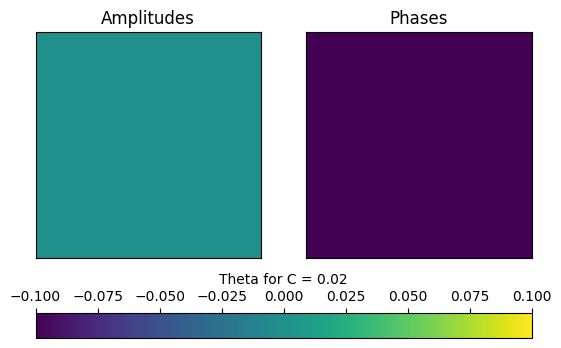

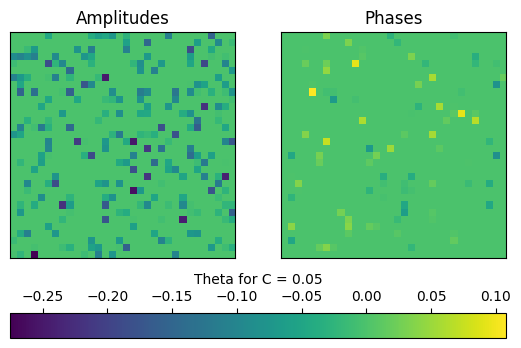

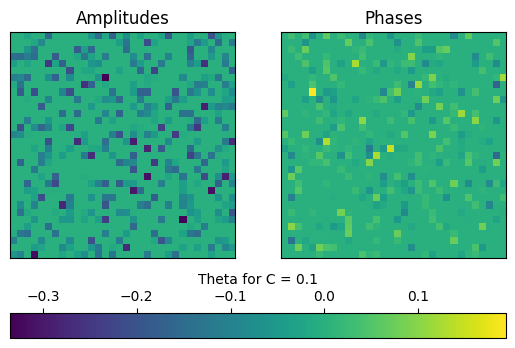

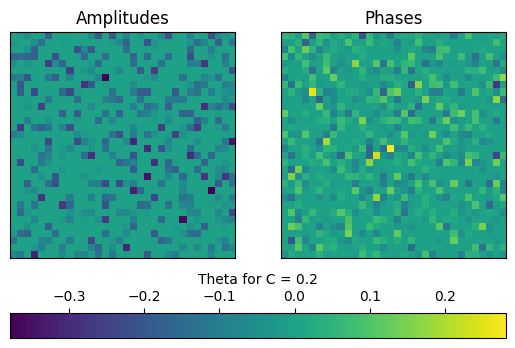

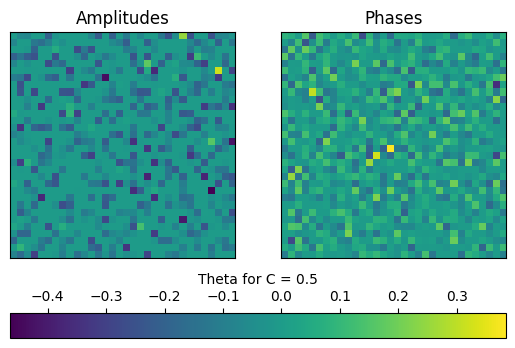

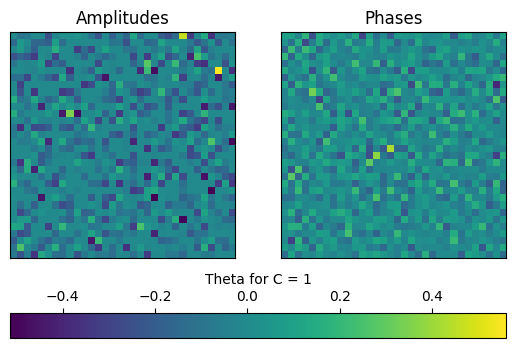

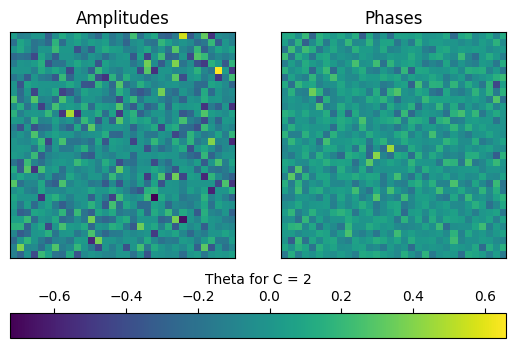

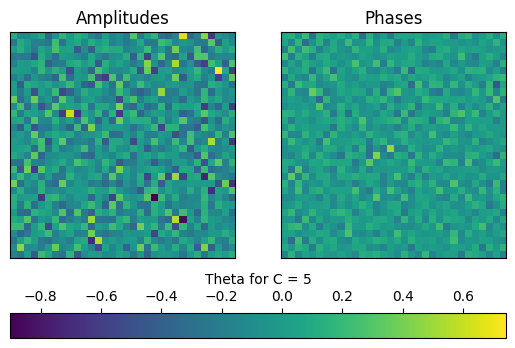

In [63]:
for C in Cs:
    fig, (ax1, ax2) = plt.subplots(1, 2)

    vmin = theta['l1'][C].min()
    vmax = theta['l1'][C].max()

    im1 = ax1.imshow(theta['l1'][C][0], vmin=vmin, vmax=vmax)
    ax2.imshow(theta['l1'][C][1], vmin=vmin, vmax=vmax)

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax1.set_yticks([])
    ax2.set_yticks([])

    ax1.set_title('Amplitudes')
    ax2.set_title('Phases')

    cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='horizontal')
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    if penalty == None:
        penalty = 'None'
    cbar.set_label('Theta for C = ' + str(C))

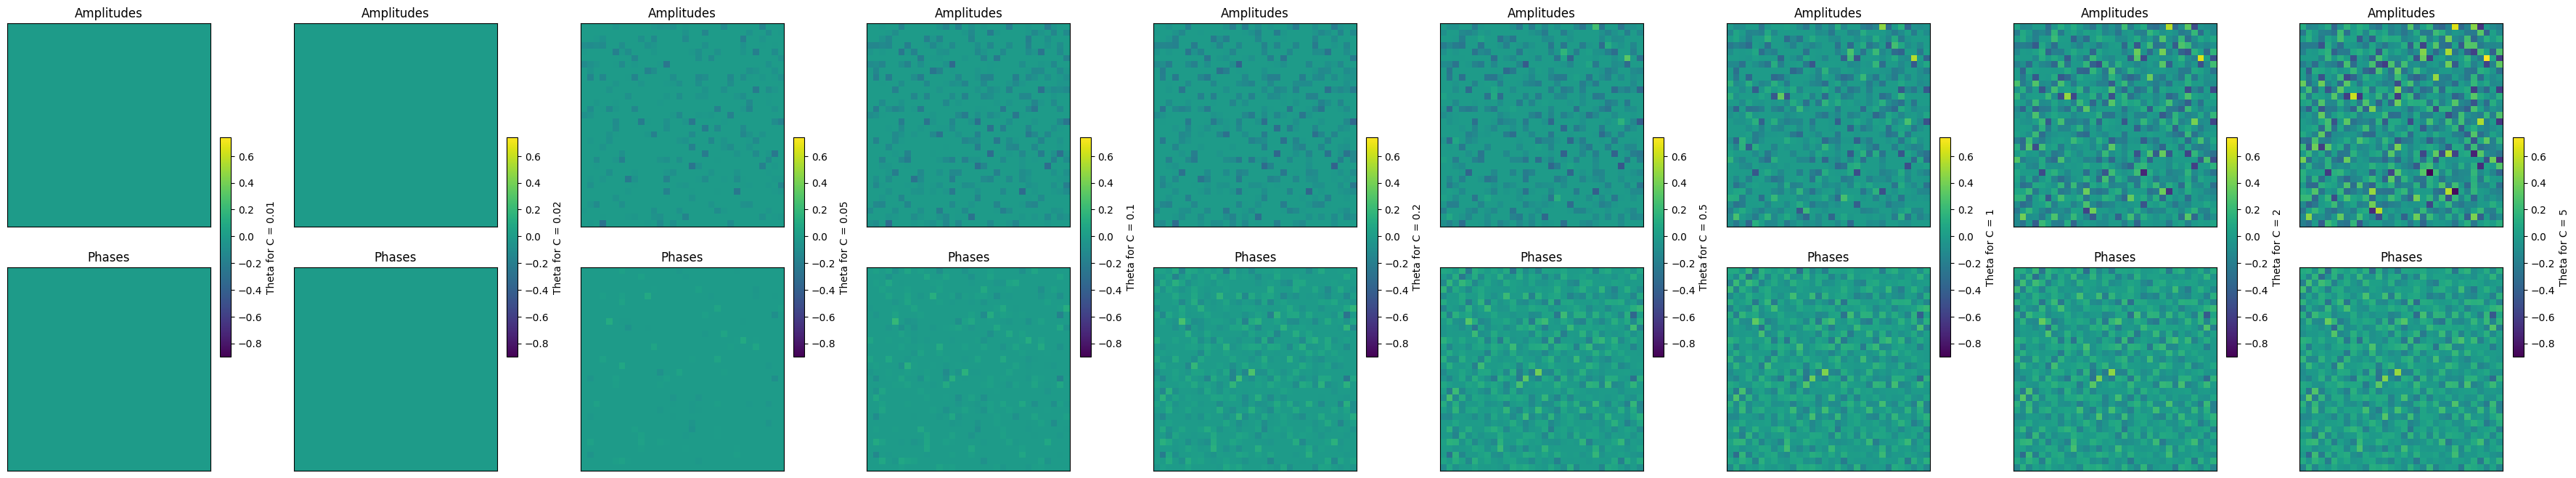

In [71]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, len(Cs), figsize=(5 * len(Cs), 8))

vmin = min(theta['l1'][C][0].min() for C in Cs)
vmax = max(theta['l1'][C][0].max() for C in Cs)

for i, C in enumerate(Cs):

    ax1 = axes[0, i]
    ax2 = axes[1, i]

    im1 = ax1.imshow(theta['l1'][C][0], vmin=vmin, vmax=vmax)
    ax2.imshow(theta['l1'][C][1], vmin=vmin, vmax=vmax)

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax1.set_yticks([])
    ax2.set_yticks([])

    ax1.set_title('Amplitudes')
    ax2.set_title('Phases')

    cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='vertical', fraction=0.046, pad=0.04)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    if penalty == None:
        penalty = 'None'
    cbar.set_label('Theta for C = ' + str(C))

plt.show()


### Figures for different penalties when C = 0.1

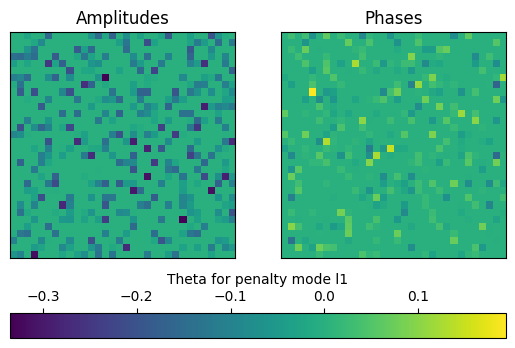

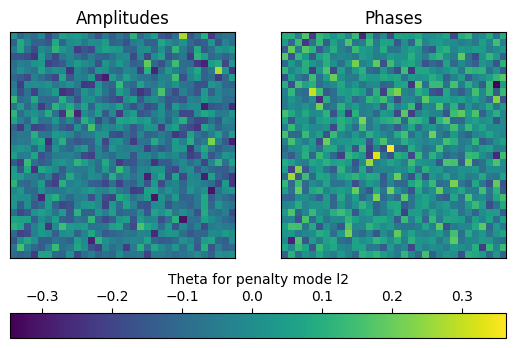

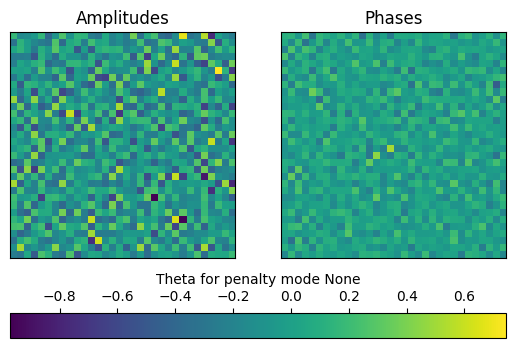

In [37]:
for penalty in penalties:
    fig, (ax1, ax2) = plt.subplots(1, 2)

    vmin = theta[penalty][0.1].min()
    vmax = theta[penalty][0.1].max()

    im1 = ax1.imshow(theta[penalty][0.1][0], vmin=vmin, vmax=vmax)
    ax2.imshow(theta[penalty][0.1][1], vmin=vmin, vmax=vmax)

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax1.set_yticks([])
    ax2.set_yticks([])

    ax1.set_title('Amplitudes')
    ax2.set_title('Phases')

    cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='horizontal')
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    if penalty == None:
        penalty = 'None'
    cbar.set_label('Theta for penalty mode ' + penalty)

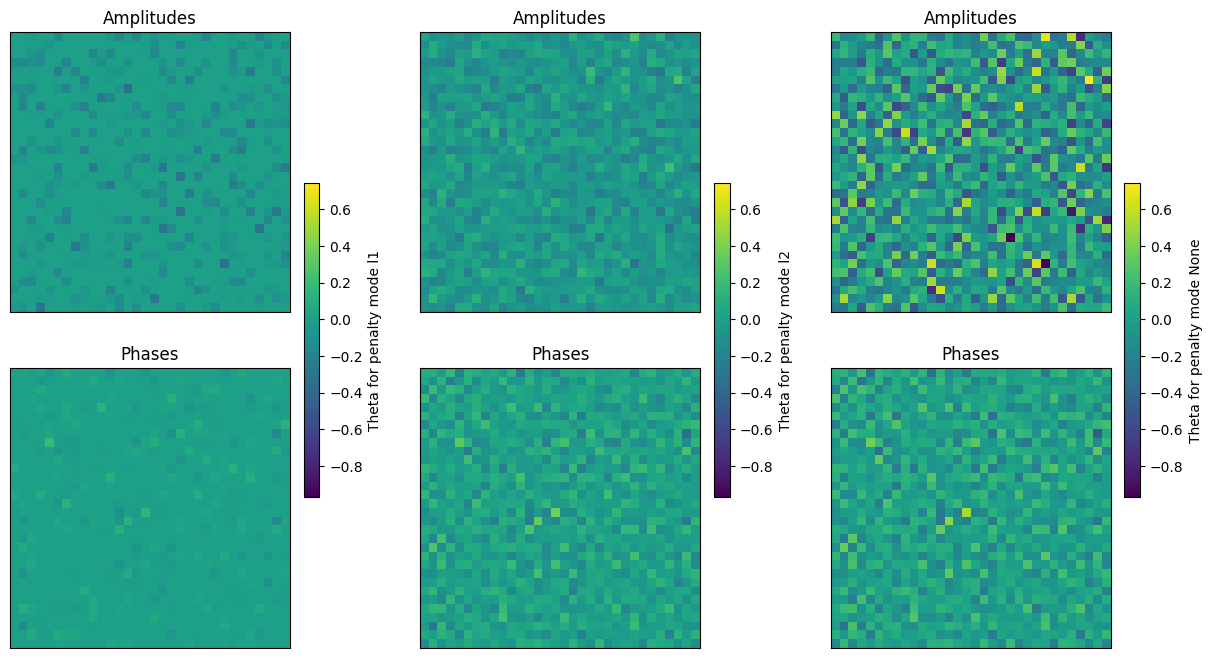

In [65]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, len(penalties), figsize=(5 * len(penalties), 8))

vmin = min(theta[penalty][0.1][0].min() for penalty in penalties)
vmax = max(theta[penalty][0.1][0].max() for penalty in penalties)

for i, penalty in enumerate(penalties):

    ax1 = axes[0, i]
    ax2 = axes[1, i]

    im1 = ax1.imshow(theta[penalty][0.1][0], vmin=vmin, vmax=vmax)
    ax2.imshow(theta[penalty][0.1][1], vmin=vmin, vmax=vmax)

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax1.set_yticks([])
    ax2.set_yticks([])

    ax1.set_title('Amplitudes')
    ax2.set_title('Phases')

    cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='vertical', fraction=0.046, pad=0.04)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    if penalty == None:
        penalty = 'None'
    cbar.set_label('Theta for penalty mode ' + penalty)

plt.show()


In [73]:
import joblib

data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='all_matches', seed=1234)
clf = LogisticRegression(penalty = 'l1', solver = 'saga', C = 0.1, max_iter = 3000, random_state = data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)
joblib.dump(clf, 'models/logisticregression.joblib') # save model

['models/logisticregression.joblib']